xt.save,0,0.43425855,4.608051e-01,0.4608111
yt.save,1,0.08189269,1.870797e-05,0.0000000


xt.save,0,-0.1641990,-0.3041508,-0.4133056,-0.4876550,-0.52792933,-0.541838470,-5.436574e-01,-5.43689e-01,-5.436890e-01
yt.save,-1,-0.8044126,-0.5752053,-0.3452713,-0.1585697,-0.04622243,-0.005494826,-9.387606e-05,-2.82478e-08,-1.332268e-15


[1]  2.4142136 -0.4142136  1.0000000

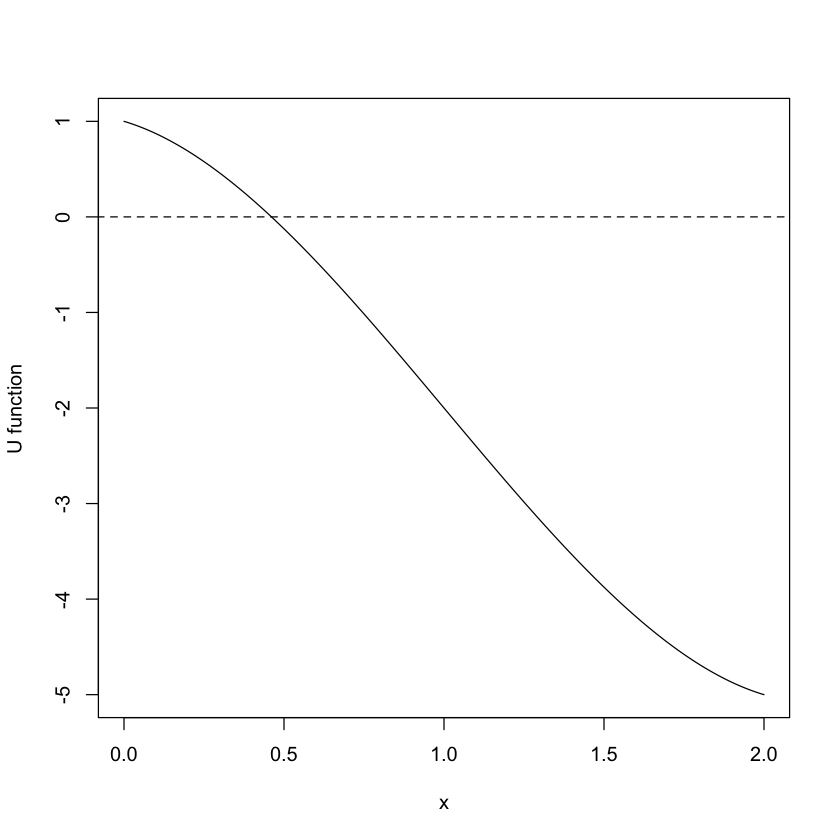

In [1]:
## Calculating the polynomial equation

root.UHE = function(a3, a2, a1, a0, a.max=10, m, x0 = 0)
{ # Function name:(a3, a2, a1, a0, a.max=10, m, x0 = 0)###########
  # ---------------------------Aim--------------------------------
  # Calculating the equation: a3*x^m+a2*x^2+a1*x+a0, 0 < x < a.max
  # ---------------------------Input------------------------------
  #    a3: the coefficient of x^m
  #    a2: the coefficient of x^2
  #    a1: the coefficient of x
  #    a0: the constant, that is a positive real number
  # a.max: the maximum of x
  #     m: the highest order of the equation
  #    x0: an initial value and the default value is 0
  # ---------------------------Output-----------------------------
  # The unique root in (0,a.max)
  ################################################################
  xt.save = c(); yt.save = c(); 
  xt = x0; y1t = a3*xt^m+a2*xt^2+a1*xt+a0
  xt.save[1] = xt; yt.save[1] = y1t
  k = 1; esp = 1
  while(esp>1e-8){
    if(a3<0){                ### When a3<0, we apply SLUB method
      if(y1t>0){ b2 = a3*m*(m-1)*a.max^(m-2) }else{b2 = 0}
      A2 = b2/2+a2
      A1 = a3*m*xt^(m-1)-b2*xt + a1
      A0 = a3*(1-m)*xt^m+b2/2*xt^2 + a0 
    }else{                   ### When a3>0, we apply TLF method
      A2 = a3*m*(m-1)/2*xt^(m-2)+a2
      A1 = a3*m*(2-m)*xt^(m-1)+a1
      A0 = a3*(m-1)*(m/2-1)*xt^m+a0
    }
    Delta.det = A1^2-4*A2*A0
    if(Delta.det>=0){
      xt.save[k+1] = -(A1+sqrt(Delta.det))/(2*A2)
      yt.save[k+1] = a3*xt.save[k+1]^m+a2*xt.save[k+1]^2+
        a1*xt.save[k+1]+a0
      esp = abs(yt.save[k+1])
      xt = xt.save[k+1]
      y1t = yt.save[k+1]
      k = k+1
    }else{
      stop(paste('There exists no root in (0,',a.max,")"))
    }
  }
  # return(c(xt,k-1))
  return(rbind(xt.save,yt.save))
}
# --------Example: x^3-3x^2-x+1 = 0----------------------------
# -------------------------------------------------------------
a3 = 1; a2 = -3; a1 = -1; a0 = 1; m = 3
root.UHE(a3,a2,a1,a0,a.max=10,m=3,x0=0)
x = seq(0,2,0.01)
plot(x, a3*x^m+a2*x^2+a1*x + a0,type='l',ylab = "U function")
lines(c(-10,10),c(0,0),lty=2)

root.UHE.revise = function(a3,a2,a1,a0,a.max=10,m,x0=0){
  flag = 0
  xt = x0
  y1t = a3*xt^m+a2*xt^2+a1*xt + a0
  if(y1t<0){
    a3 = -a3*(-1)^m; a2 = -a2; a0 = -a0; y1t = a3*xt^m+a2*xt^2+a1*xt+a0
    flag = 1
  }
  if(flag){
    -root.UHE(a3,a2,a1,a0,a.max=10,m=3,x0=0)
  }else{
    root.UHE(a3,a2,a1,a0,a.max=10,m=3,x0=0)
  }
}

a3 = -1; a2 = 1; a1 = -1; a0 = -1; m = 3
est.res0 = root.UHE.revise(a3,a2,a1,a0,a.max=4,m,x0=4)
est.res = est.res0

root.UHE.revise(a3,a2,a1,a0,a.max,m=3,x0=0)

# xt = est.res[1,i+1]
# y1t = est.res[2,i+1]
# plot_points(x,y2,xt,y1t, i+1,thea=1,adjus1)
# xt = est.res[1,dim(est.res)[2]]
# y1t = est.res[2,dim(est.res)[2]]
# adjus1 = c(-0.05, 0)
# plot_points(x,y2,xt,y1t,i+1,adjus1,T,thea=1, poi="bottomleft")


############solving a3*xt^3+a2*xt^2+a1*xt + a0 = 0 with closed-form solution###
root_ploynomial_3 = function(a3, a2, a1, a0)
{ # Function name:(a3, a2, a1, a0)################################
  # ---------------------------Aim--------------------------------
  # Calculating the equation: a3*x^3+a2*x^2+a1*x+a0, -inf <x < inf
  # ---------------------------Input------------------------------
  #    a3: the coefficient of x^3
  #    a2: the coefficient of x^2
  #    a1: the coefficient of x
  #    a0: the constant, that is a positive real number
  # ---------------------------Output-----------------------------
  # The real roots 
  ################################################################
  nroot <- function(x,n)
  { # Function for calculating x^(1/n), n = 1,3,5,...     
    abs(x)^(1/n)*sign(x)
  }
  p = (3*a3*a1-a2^2)/(3*a3^2)
  q = (2*a2^3-9*a3*a2*a1+27*a3^2*a0)/(27*a3^3)
  disterm = (q/2)^2+(p/3)^3
  if(disterm>=0){    ## When disterm>0, there exists one real root
    u1 = nroot(-q/2+sqrt((q/2)^2+(p/3)^3),3)
    u2 = nroot(-q/2-sqrt((q/2)^2+(p/3)^3),3)
    t1 = u1+u2
    omega = complex(real=- 1,imaginary=sqrt(3))/2
    t2 = omega*u1 + omega^2*u2
    t3 = omega^2*u1 + omega*u2
    x1 = t1 - a2/(3*a3)
    return(x1)
  }else{           ## When disterm>0, there exist three real roots
    r = sqrt(-(p/3)^3)
    theta = 1/3*acos(-q/(2*r))
    t1 = 2*nroot(r,3)*cos(theta)
    t2 = 2*nroot(r,3)*cos(theta+2/3*pi)
    t3 = 2*nroot(r,3)*cos(theta+4/3*pi)
    x1 = t1 - a2/(3*a3)
    x2 = t2 - a2/(3*a3)
    x3 = t3 - a2/(3*a3)
    return(c(x1,x2,x3))
  }
}

root_ploynomial_3(1,-3,1,1)


In [7]:
#### case 1: Root of a high-order polynomial equation

# calculating unique higher-order equation with SLUB method

root.UHE = function(a3, a2, a1, a0, a.max=10, m, x0 = 0)
{ 
  xt.save = c(); yt.save = c(); 
  xt = x0; y1t = a3*xt^m+a2*xt^2+a1*xt+a0
  xt.save[1] = xt; yt.save[1] = y1t
  k = 1; esp = 1
  while(esp>1e-8){
    if(a3<0){                ### When a3<0, we apply SLUB method
      if(y1t>0){ b2 = a3*m*(m-1)*a.max^(m-2) }else{b2 = 0}
      A2 = b2/2+a2
      A1 = a3*m*xt^(m-1)-b2*xt + a1
      A0 = a3*(1-m)*xt^m+b2/2*xt^2 + a0 
    }else{                   ### When a3>0, we apply TLF method
      A2 = a3*m*(m-1)/2*xt^(m-2)+a2
      A1 = a3*m*(2-m)*xt^(m-1)+a1
      A0 = a3*(m-1)*(m/2-1)*xt^m+a0
    }
    Delta.det = A1^2-4*A2*A0
    if(Delta.det>=0){
      xt.save[k+1] = -(A1+sqrt(Delta.det))/(2*A2)
      yt.save[k+1] = a3*xt.save[k+1]^m+a2*xt.save[k+1]^2+
        a1*xt.save[k+1]+a0
      esp = abs(yt.save[k+1])
      xt = xt.save[k+1]
      y1t = yt.save[k+1]
      k = k+1
    }else{
      stop(paste('There exists no root in (0,',a.max,")"))
    }
  }
  return(c(xt,k-1))
}


# calculating unique higher-order equation with TLB method
root.UHE3 = function(a3,a2,a1,a0,a.max=10,m,x0=0){
  xt.save = c(); yt.save = c()
  xt = x0; y1t = a3*xt^m+a2*xt^2+a1*xt+a0
  xt.save[1] = xt; yt.save[1] = y1t
  k = 1; esp = 1
  while(esp>1e-8){### Applying TLF method
    A2 = a3*m*(m-1)/2*xt^(m-2)+a2
    A1 = a3*m*(2-m)*xt^(m-1) + a1
    A0 = a3*(m-1)*(m/2-1)*xt^m + a0
    Delta.det = A1^2-4*A2*A0
    if(Delta.det>=0){
      xt.save[k+1] = -(A1+sqrt(Delta.det))/(2*A2)
      yt.save[k+1] = a3*xt.save[k+1]^m+a2*xt.save[k+1]^2+a1*xt.save[k+1] + a0
      esp = abs(yt.save[k+1])
      xt = xt.save[k+1]
      y1t = yt.save[k+1]
      k = k+1
    }else{
      stop(paste('There exists no root in (0,',a.max,")"))
    }
  }
  return(c(xt,k-1))
  # return(rbind(xt.save,yt.save))
}


# calculating unique higher-order equation with NR method
root.NR = function(a3,a2,a1,a0,m){
  xt.save.2 = c(); yt.save.2 = c(); xt = x0
  y1t = a3*xt^m+a2*xt^2+a1*xt+a0
  xt.save.2[1] = xt; yt.save.2[1] = y1t
  k = 1; esp = 1
  while(esp>1e-12){
    g.prime = m*a3*xt^(m-1)+2*a2*xt+a1
    xt.save.2[k+1] = xt - y1t/g.prime
    yt.save.2[k+1] = a3*xt.save.2[k+1]^m+a2*xt.save.2[k+1]^2+a1*xt.save.2[k+1]+a0
    esp = abs(yt.save.2[k+1])
    xt = xt.save.2[k+1]
    y1t = yt.save.2[k+1]
    k = k+1
    if(is.infinite(xt)){
      # return(rbind(xt.save.2,yt.save.2))
      return(c(xt,k-1))
      stop("Please choose a proper initial value")
    }
  }
  return(c(xt,k-1))
  # return(rbind(xt.save.2,yt.save.2))
}

# calculating unique higher-order equation with Bisection method
root.BS = function(a3,a2,a1,a0,m){
  a.bound = c(0,2)
  xt.save.2 = c(); yt.save.2 = c(); xt = sum(a.bound)/2
  y1t = a3*xt^m+a2*xt^2+a1*xt+a0
  xt.save.2[1] = xt; yt.save.2[1] = y1t
  k = 1; esp = 1
  while(esp>1e-12){
    a.bound[2-sum(yt.save.2[k]>0)] = sum(a.bound)/2
    xt.save.2[k+1] = sum(a.bound)/2
    yt.save.2[k+1] = a3*xt.save.2[k+1]^m+a2*xt.save.2[k+1]^2+a1*xt.save.2[k+1] + a0
    esp = abs(yt.save.2[k+1])
    k = k+1
  }
  return(c(xt.save.2[k],k-1))
  # return(rbind(xt.save.2,yt.save.2))
}
# est.res5 = root.BS(a3,a2,a1,a0,m)
# est.res = est.res5

## comparisons of NR Bisec and US
a3 = -1; a2 = 1; a1 = -1; a0 = 1; m = 3; n.rep = 100000
start.time = Sys.time()
num.inva0 = 0
num.iter0 = 0
for(i in c(1:n.rep)){
  x0 = runif(1,0,2)
  est.res3 = root.UHE3(a3,a2,a1,a0,a.max=2,m,x0=0)
  if(is.infinite(est.res3[1])){
    num.inva0 = num.inva0 + 1
  }else{
    num.iter0 = num.iter0 + est.res3[2]
  }
}
end.time = Sys.time()
time.us0 = end.time - start.time

a3 = 1; a2 = -3; a1 = -1; a0 = 1; m = 3; n.rep = 100000
start.time = Sys.time()
num.inva1 = 0
num.iter1 = 0
for(i in c(1:n.rep)){
  x0 = runif(1,0,2)
  est.res3 = root.UHE3(a3,a2,a1,a0,a.max=2,m,x0=0)
  if(is.infinite(est.res3[1])){
    num.inva1 = num.inva1 + 1
  }else{
    num.iter1 = num.iter1 + est.res3[2]
  }
}
end.time = Sys.time()
time.us = end.time - start.time


start.time = Sys.time()
num.inva2 = 0
num.iter2 = 0
for(i in c(1:n.rep)){
  x0 = runif(1,0,2)
  est.res3 = root.NR(a3,a2,a1,a0,m)
  if(is.infinite(est.res3[1])){ 
    num.inva2 = num.inva2 + 1
  }else{
    num.iter2 = num.iter2 + est.res3[2]
  }
}
end.time = Sys.time()
time.nr = end.time - start.time

start.time = Sys.time()
num.inva3 = 0
num.iter3 = 0
for(i in c(1:n.rep)){
  x0 = runif(1,0,2)
  est.res3 = root.BS(a3,a2,a1,a0,m)
  if(is.infinite(est.res3[1])){ 
    num.inva3 = num.inva3 + 1
  }else{
    num.iter3 = num.iter3 + est.res3[2]
  }
}
end.time = Sys.time()
time.bs = end.time - start.time

time.tra = rbind(c(time.us0, num.inva0,num.iter0/n.rep/(1-num.inva0)),
                 # c(time.us, num.inva1,num.iter1/n.rep/(1-num.inva1)), 
                 c(time.nr, num.inva2,num.iter2/(n.rep-num.inva2)), 
                 c(time.bs, num.inva3,num.iter3/n.rep/(1-num.inva3)))
time.tra

0.7998860,0,7.00000
0.5673151,0,4.78238
3.8695109,0,40.00000


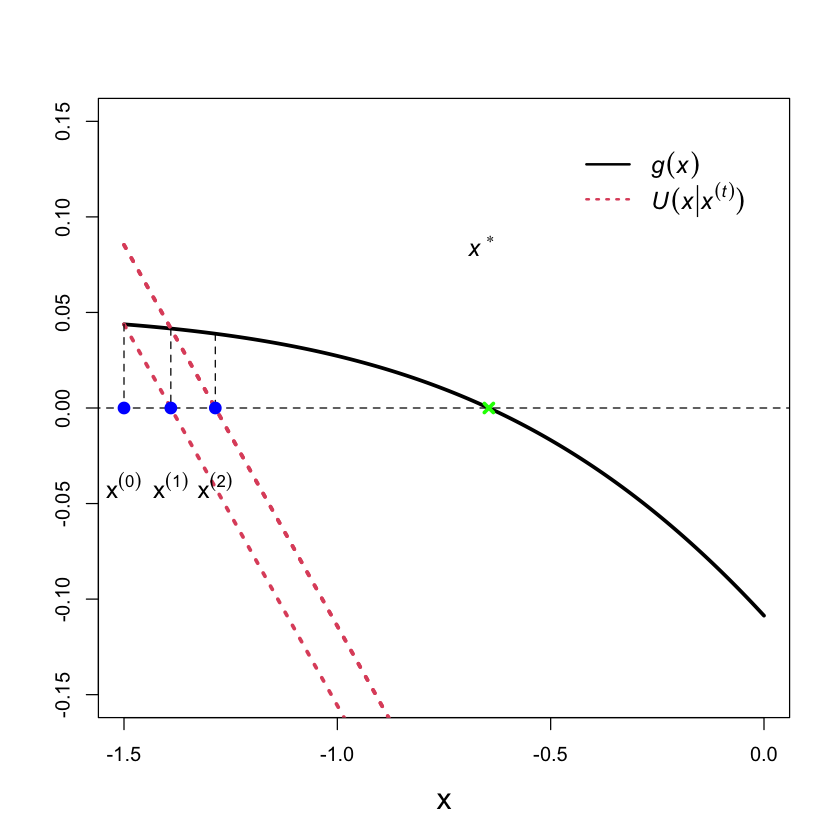

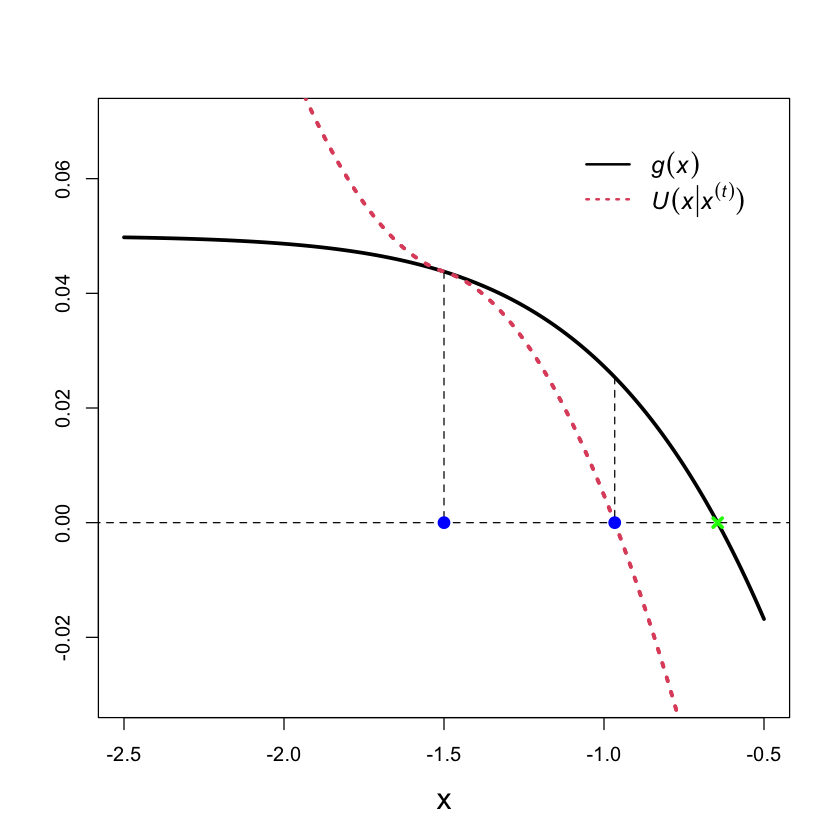

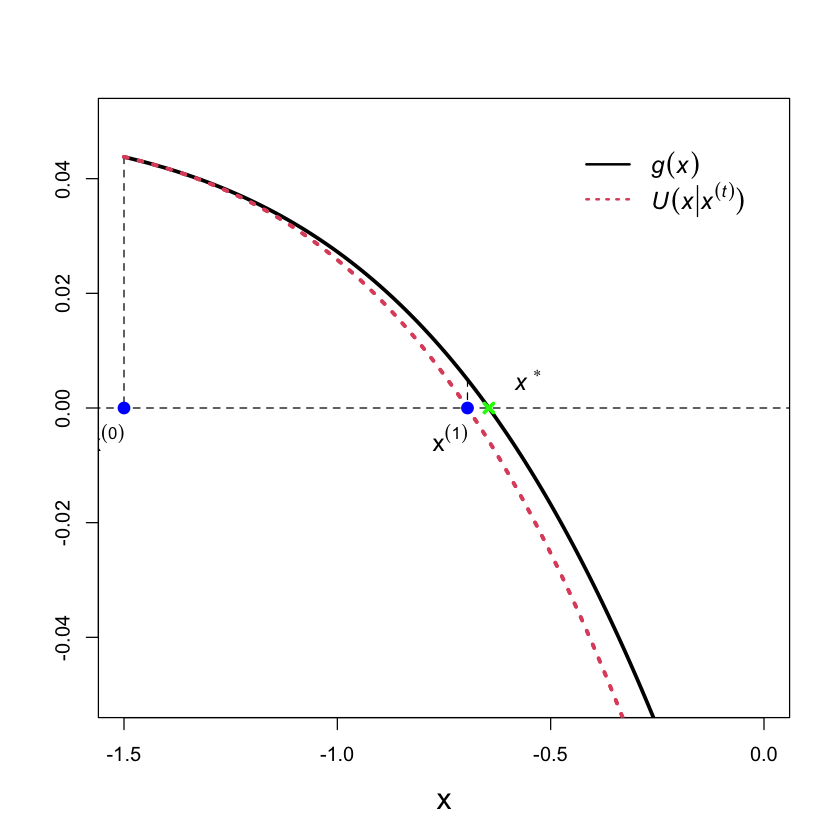

xt.save.2,-1.50000000,-1.39023391,-1.28600535,-1.18856512,-1.09911417,-1.01865997,-0.9478760,-0.88700230,-0.83581697,-0.79368648,⋯,-6.448536e-01,-6.448536e-01,-6.448536e-01,-6.448536e-01,-6.448536e-01,-6.448536e-01,-6.448536e-01,-6.448536e-01,-6.448536e-01,-6.448536e-01
yt.save.2,0.04379033,0.04158118,0.03887303,0.03568577,0.03209658,0.02823871,0.0242851,0.02041999,0.01680763,0.01356839,⋯,1.468003e-11,1.088496e-11,8.070933e-12,5.984435e-12,4.437298e-12,3.290160e-12,2.439583e-12,1.808907e-12,1.341253e-12,9.945170e-13


xt.save.2,-1.50000000,-0.96647367,-0.688582498,-6.455499e-01,-6.448538e-01,-6.448536e-01
yt.save.2,0.04379033,0.02537804,0.004350266,7.177328e-05,1.754519e-08,1.068590e-15


xt.save.2,-1.50000000,-0.694973999,-6.448538e-01,-6.448536e-01
yt.save.2,0.04379033,0.004959823,1.475293e-08,-1.387779e-17


xt.save.2,-1.50000000,0.9982647,-0.12798442,-0.50523941,-0.630772688,-0.6446927310,-6.448536e-01,-6.448536e-01
yt.save.2,0.04379033,-0.4493077,-0.07966325,-0.01613127,-0.001469146,-0.0000165963,-2.195480e-09,-4.163336e-17


xt.save.2,0.0000000,-10.00,-5.00,-2.50000000,-1.25000000,-0.625000000,-0.93750000,-0.78125000,-0.703125000,-0.66406250,⋯,-6.448536e-01,-6.448536e-01,-6.448536e-01,-6.448536e-01,-6.448536e-01,-6.448536e-01,-6.448536e-01,-6.448536e-01,-6.448536e-01,-6.448536e-01
yt.save.2,-0.1086553,0.05,0.05,0.04976737,0.03777553,-0.002081279,0.02365787,0.01256419,0.005727661,0.00195003,⋯,-2.844682e-09,-9.236308e-10,3.689476e-11,-4.433680e-10,-2.032366e-10,-8.317094e-11,-2.313809e-11,6.878331e-12,-8.129865e-12,-6.257703e-13


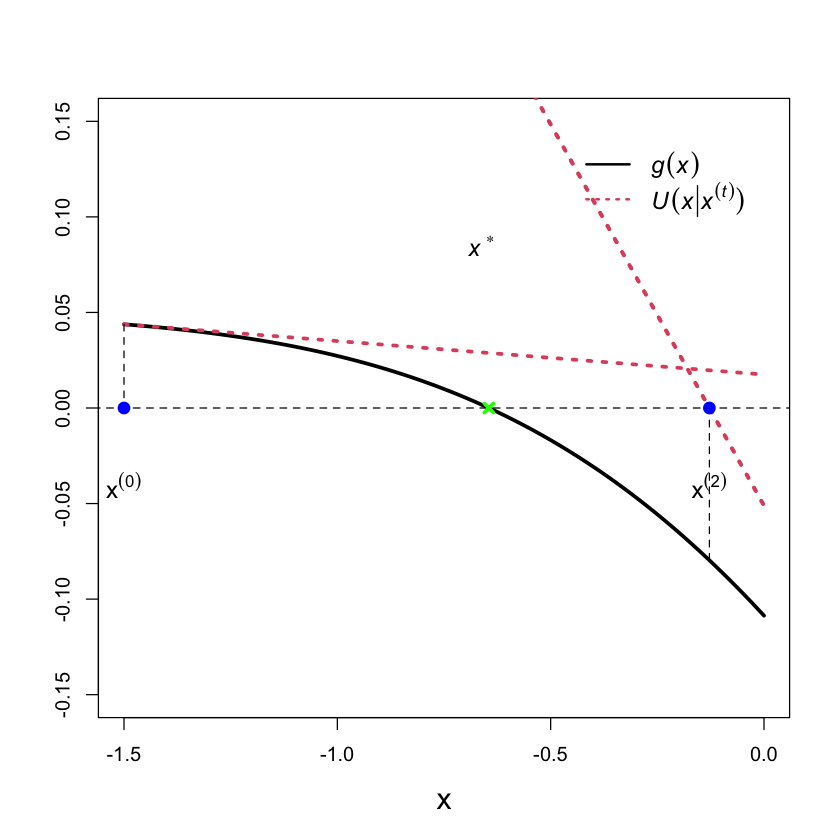

In [3]:
#####case 2: 0.5-th quantile of normal distribution
############plots of two U functions###############
library(latex2exp)

plot_points = function(x,y2,xt,y1t,i,adjus1,star1=F,thea=1, poi="topright"){
  if(!star1){
    lines(x,y2,type='l', xlab = expression(theta),ylab = 'b',lwd = 3,col=2, lty=3)
    lines(c(xt,xt),c(y1t,0),type = 'l',lty=2)
    points(xt,0, lwd = 3, col = "blue", pch=19)
    if(thea==1){
      text((xt+adjus1[1]),adjus1[2],as.expression(
        substitute(theta^(alpha),list(alpha = i-1))),cex=1.2)
    }else{
      text((xt+adjus1[1]),adjus1[2],as.expression(
        substitute(x^(alpha),list(alpha = i-1))),cex=1.2)
    }
  }
  if(star1){
    points(xt,0, lwd = 3, col = "green" , pch=4)
    legend((xt+adjus1[1]),adjus1[2], bty='n',legend = c(TeX('$\\textit{theta}^*$'),TeX('$\\textit{x}^*$'))[thea],cex=1.2)
    lenge1 = c(TeX('$\\textit{g(\\theta)}$'), TeX('$\\textit{U(\\theta|\\theta^{(t)})}$'))
    lenge2 = c(TeX('$\\textit{g(x)}$'), TeX('$\\textit{U(x|x^{(t)})}$'))
    legend(poi, inset=.05, legend = c(lenge1,lenge2)[c(1,2)+(thea-1)*2],
           lty=c(1,3),col=c(1,2),
           bty='n',lwd = c(2,2),cex=1.2)
  }
}

mu = 1; sig = 1; p = 0.05; x0 = 0
x0 = -1.5
###################FLB algorithm##################
estimation_fun2 = function(mu,sig,p,x0=0){
  xt.save.2 = c(); yt.save.2 = c(); xt = x0
  y1t = p - pnorm(xt,mu,sig)
  xt.save.2[1] = xt; yt.save.2[1] = y1t
  k = 1; esp = 1
  while(esp>1e-12){
    xt.save.2[k+1] = xt + y1t/dnorm(mu,mu,sig)
    yt.save.2[k+1] = p - pnorm(xt.save.2[k+1],mu,sig)
    esp = abs(yt.save.2[k+1])
    xt = xt.save.2[k+1]
    y1t = yt.save.2[k+1]
    k = k+1
  }
  return(rbind(xt.save.2,yt.save.2))
}
est.res1 = estimation_fun2(mu,sig,p,x0)
est.res = est.res1
x = seq(-1.5,0,0.01)
y1 = p - pnorm(x,mu,sig)
plot(x,y1,type='l', ylim=c(-0.15,0.15),
     xlab = c(expression(theta),'x')[2],ylab = '',cex.lab = 1.5,lwd = 3,col=1, lty=1)
lines(c(-100,100),c(0,0),lty=2 ,lwd = 1)

for(i in c(1:2)){
  xt = est.res[1,i]
  y1t = est.res[2,i]
  y2 = y1t - dnorm(mu,mu,sig)*(x-xt)
  adjus1 = c(0.0,-0.04)
  plot_points(x,y2,xt,y1t,i,adjus1,thea=2)
}
xt = est.res[1,i+1];              y1t = est.res[2,i+1]
plot_points(x,y2,xt,y1t,i+1,adjus1,thea=2)
xt = est.res[1,dim(est.res)[2]];  y1t = est.res[2,dim(est.res)[2]]
adjus1 = c(-0.15,0.1)
plot_points(x,y2,xt,y1t,i+1,adjus1,star1 = T,thea=2)
###################SLUB algorithm#################
estimation_fun2.2 = function(mu,sig,p,x0=0){
  xt.save.2 = c(); yt.save.2 = c(); xt = x0
  y1t = p - pnorm(xt,mu,sig)
  xt.save.2[1] = xt; yt.save.2[1] = y1t
  k = 1; esp = 1
  while(esp>1e-12){
    g.prime = -dnorm(xt,mu,sig)
    if(y1t>0){
      b2 = -1/(sig^3*sqrt(2*pi)*exp(1/2))
    }else{
      b2 = 1/(sig^3*sqrt(2*pi)*exp(1/2))
    }
    A1 = b2/2; A2 = -dnorm(xt,mu,sig); A3 = p-pnorm(xt,mu,sig)
    # A1*(xt-xt)^2+A2*(xt-xt)+A3
    xt.save.2[k+1] = xt -(A2+sqrt(A2^2-4*A1*A3))/(2*A1)
    yt.save.2[k+1] = p-pnorm(xt.save.2[k+1],mu,sig)
    esp = abs(yt.save.2[k+1])
    xt = xt.save.2[k+1]
    y1t = yt.save.2[k+1]
    k = k+1
  }
  # return(c(xt,k-1))
  return(rbind(xt.save.2,yt.save.2))
}
est.res2 = estimation_fun2.2(mu,sig,p,x0)
est.res = est.res2
x = seq(-2.5,-0.5,0.01)
y1 = p - pnorm(x,mu,sig)
plot(x,y1,type='l', ylim=c(-0.03,0.07),
     xlab = c(expression(theta),'x')[2],ylab = '',cex.lab = 1.5,lwd = 3,col=1, lty=1)
lines(c(-100,100),c(0,0),lty=2 ,lwd = 1)

for(i in c(1:1)){
  xt = est.res[1,i]
  y1t = est.res[2,i]
  b2 = ((x<=xt)-(x>xt))/(sig^3*sqrt(2*pi)*exp(1/2))
  y2 = y1t - dnorm(xt,mu,sig)*(x-xt) + b2/2*(x-xt)^2
  adjus1 = c(0.0,-0.04)
  plot_points(x,y2,xt,y1t,i,adjus1,thea=2)
}
xt = est.res[1,i+1];              y1t = est.res[2,i+1]
plot_points(x,y2,xt,y1t,i+1,adjus1,thea=2)
xt = est.res[1,dim(est.res)[2]];  y1t = est.res[2,dim(est.res)[2]]
adjus1 = c(-0.15,0.1)
plot_points(x,y2,xt,y1t,i+1,adjus1,star1 = T,thea=2)

###################TLB algorithm##################
estimation_fun2.3 = function(mu,sig,p,x0=0){
  xt.save.2 = c(); yt.save.2 = c(); xt = x0
  y1t = p - pnorm(xt,mu,sig)
  xt.save.2[1] = xt; yt.save.2[1] = y1t
  k = 1; esp = 1
  while(esp>1e-12){
    g.prime = -dnorm(xt,mu,sig)
    g.primeprime = (xt-mu)/sig^2*dnorm(xt,mu,sig)
    a3 = -1/(3*sig^3*sqrt(2*pi)*exp(3/2))
    a2 = g.primeprime/2
    a1 = g.prime
    a0 = y1t
    # res11 = root.UHE.revise(a3,a2,a1,a0,a.max=10,m=3,x0=0)
    # xt.save.2[k+1] = xt + res11[1,dim(res11)[2]]
    res11 = root_ploynomial_3(a3,a2,a1,a0)
    if(length(res11)==1){
      xt.save.2[k+1] = xt + res11[1]
    }else{
      if(y1t>0){
        xt.save.2[k+1] = xt + min(res11[res11>=0])
      }else{
        xt.save.2[k+1] = xt + max(res11[res11<=0])
      }
    }
    yt.save.2[k+1] = p-pnorm(xt.save.2[k+1],mu,sig)
    esp = abs(yt.save.2[k+1])
    xt = xt.save.2[k+1]
    y1t = yt.save.2[k+1]
    k = k+1
  }
#   return(c(xt,k-1))
  return(rbind(xt.save.2,yt.save.2))
}
est.res3 = estimation_fun2.3(mu,sig,p,x0)
est.res = est.res3
x = seq(-1.5,0,0.01)
y1 = p - pnorm(x,mu,sig)
plot(x,y1,type='l', ylim=c(-0.05,0.05),
     xlab = c(expression(theta),'x')[2],ylab = '',cex.lab = 1.5,lwd = 3,col=1, lty=1)
lines(c(-100,100),c(0,0),lty=2 ,lwd = 1)

for(i in c(1:1)){
  xt = est.res[1,i]
  y1t = est.res[2,i]
  y2 = y1t - dnorm(xt,mu,sig)*(x-xt) + (xt-mu)/sig^2*dnorm(xt,mu,sig)/2*(x-xt)^2 +
    -1/(3*sig^3*sqrt(2*pi)*exp(3/2))*(x-xt)^3
  adjus1 = c(-0.04,-0.005)
  plot_points(x,y2,xt,y1t,i,adjus1,thea=2)
}
xt = est.res[1,i+1];              y1t = est.res[2,i+1]
plot_points(x,y2,xt,y1t,i+1,adjus1,thea=2)
xt = est.res[1,dim(est.res)[2]];  y1t = est.res[2,dim(est.res)[2]]
adjus1 = c(-0.04,0.01)
plot_points(x,y2,xt,y1t,i+1,adjus1,star1 = T,thea=2)

estimation_fun2.NR = function(mu,sig,p,x0=0){
  # p = 0.00000001
  xt.save.2 = c(); yt.save.2 = c(); xt = x0
  y1t = p - pnorm(xt,mu,sig)
  xt.save.2[1] = xt; yt.save.2[1] = y1t
  k = 1; esp = 1
  while(esp>1e-12){
    g.prime = -dnorm(xt,mu,sig)
    xt.save.2[k+1] = xt - y1t/g.prime
    yt.save.2[k+1] = p-pnorm(xt.save.2[k+1],mu,sig)
    esp = abs(yt.save.2[k+1])
    xt = xt.save.2[k+1]
    y1t = yt.save.2[k+1]
    k = k+1
    if(is.infinite(xt)){
      # return(rbind(xt.save.2,yt.save.2))
      return(c(xt,k-1))
      stop("Please choose a proper initial value")
    }
  }
#   return(c(xt,k-1))
  return(rbind(xt.save.2,yt.save.2))
}
est.res4 = estimation_fun2.NR(mu,sig,p,x0)
est.res = est.res4
x = seq(-1.5,0,0.01)
y1 = p - pnorm(x, mu, sig)
plot(x,y1,type='l', ylim=c(-0.15,0.15),
     xlab = c(expression(theta),'x')[2],ylab = '',cex.lab = 1.5,lwd = 3,col=1, lty=1)
lines(c(-100,100),c(0,0),lty=2 ,lwd = 1)

for(i in c(1:2)){
  xt = est.res[1,i]
  y1t = est.res[2,i]
  y2 = y1t - dnorm(xt,mu,sig)*(x-xt)
  adjus1 = c(0.0,-0.04)
  plot_points(x,y2,xt,y1t,i,adjus1,thea=2)
}
xt = est.res[1,i+1];              y1t = est.res[2,i+1]
plot_points(x,y2,xt,y1t,i+1,adjus1,thea=2)
xt = est.res[1,dim(est.res)[2]];  y1t = est.res[2,dim(est.res)[2]]
adjus1 = c(-0.15,0.1)
plot_points(x,y2,xt,y1t,i+1,adjus1,star1 = T,thea=2)


estimation_fun2.BS = function(mu,sig,p,x0=0){
  # p = 0.00000001
  a.bound = c(-20,20)
  xt.save.2 = c(); yt.save.2 = c(); xt = sum(a.bound)/2
  y1t = p - pnorm(xt,mu,sig)
  xt.save.2[1] = xt; yt.save.2[1] = y1t
  k = 1; esp = 1
  while(esp>1e-12){
    a.bound[2-sum(yt.save.2[k]>0)] = sum(a.bound)/2
    xt.save.2[k+1] = sum(a.bound)/2
    yt.save.2[k+1] = p-pnorm(xt.save.2[k+1],mu,sig)
    esp = abs(yt.save.2[k+1])
    k = k+1
  }
#   return(c(xt,k-1))
  return(rbind(xt.save.2,yt.save.2))
}
est.res5 = estimation_fun2.BS(mu,sig,p,x0)
est.res = est.res5




est.res1
est.res2
est.res3
est.res4
est.res5

In [4]:
#####case 2: 0.5-th quantile of normal distribution
############comparing efficiency of four methods###############

mu = 1; sig = 1; p = 0.05; x0 = 0
x0 = -1.5
###################SLUB algorithm#################
estimation_fun2.2 = function(mu,sig,p,x0=0){
  xt.save.2 = c(); yt.save.2 = c(); xt = x0
  y1t = p - pnorm(xt,mu,sig)
  xt.save.2[1] = xt; yt.save.2[1] = y1t
  k = 1; esp = 1
  while(esp>1e-12){
    g.prime = -dnorm(xt,mu,sig)
    if(y1t>0){
      b2 = -1/(sig^3*sqrt(2*pi)*exp(1/2))
    }else{
      b2 = 1/(sig^3*sqrt(2*pi)*exp(1/2))
    }
    A1 = b2/2; A2 = -dnorm(xt,mu,sig); A3 = p-pnorm(xt,mu,sig)
    # A1*(xt-xt)^2+A2*(xt-xt)+A3
    xt.save.2[k+1] = xt -(A2+sqrt(A2^2-4*A1*A3))/(2*A1)
    yt.save.2[k+1] = p-pnorm(xt.save.2[k+1],mu,sig)
    esp = abs(yt.save.2[k+1])
    xt = xt.save.2[k+1]
    y1t = yt.save.2[k+1]
    k = k+1
  }
  return(c(xt,k-1))
}

###################TLB algorithm##################
estimation_fun2.3 = function(mu,sig,p,x0=0){
  xt.save.2 = c(); yt.save.2 = c(); xt = x0
  y1t = p - pnorm(xt,mu,sig)
  xt.save.2[1] = xt; yt.save.2[1] = y1t
  k = 1; esp = 1
  while(esp>1e-12){
    g.prime = -dnorm(xt,mu,sig)
    g.primeprime = (xt-mu)/sig^2*dnorm(xt,mu,sig)
    a3 = -1/(3*sig^3*sqrt(2*pi)*exp(3/2))
    a2 = g.primeprime/2
    a1 = g.prime
    a0 = y1t
    # res11 = root.UHE.revise(a3,a2,a1,a0,a.max=10,m=3,x0=0)
    # xt.save.2[k+1] = xt + res11[1,dim(res11)[2]]
    res11 = root_ploynomial_3(a3,a2,a1,a0)
    if(length(res11)==1){
      xt.save.2[k+1] = xt + res11[1]
    }else{
      if(y1t>0){
        xt.save.2[k+1] = xt + min(res11[res11>=0])
      }else{
        xt.save.2[k+1] = xt + max(res11[res11<=0])
      }
    }
    yt.save.2[k+1] = p-pnorm(xt.save.2[k+1],mu,sig)
    esp = abs(yt.save.2[k+1])
    xt = xt.save.2[k+1]
    y1t = yt.save.2[k+1]
    k = k+1
  }
  return(c(xt,k-1))
}

estimation_fun2.NR = function(mu,sig,p,x0=0){
  # p = 0.00000001
  xt.save.2 = c(); yt.save.2 = c(); xt = x0
  y1t = p - pnorm(xt,mu,sig)
  xt.save.2[1] = xt; yt.save.2[1] = y1t
  k = 1; esp = 1
  while(esp>1e-12){
    g.prime = -dnorm(xt,mu,sig)
    xt.save.2[k+1] = xt - y1t/g.prime
    yt.save.2[k+1] = p-pnorm(xt.save.2[k+1],mu,sig)
    esp = abs(yt.save.2[k+1])
    xt = xt.save.2[k+1]
    y1t = yt.save.2[k+1]
    k = k+1
    if(is.infinite(xt)){
      # return(rbind(xt.save.2,yt.save.2))
      return(c(xt,k-1))
      stop("Please choose a proper initial value")
    }
  }
  return(c(xt,k-1))
}
estimation_fun2.BS = function(mu,sig,p,x0=0){
  # p = 0.00000001
  a.bound = c(-20,20)
  xt.save.2 = c(); yt.save.2 = c(); xt = sum(a.bound)/2
  y1t = p - pnorm(xt,mu,sig)
  xt.save.2[1] = xt; yt.save.2[1] = y1t
  k = 1; esp = 1
  while(esp>1e-12){
    a.bound[2-sum(yt.save.2[k]>0)] = sum(a.bound)/2
    xt.save.2[k+1] = sum(a.bound)/2
    yt.save.2[k+1] = p-pnorm(xt.save.2[k+1],mu,sig)
    esp = abs(yt.save.2[k+1])
    k = k+1
  }
  return(c(xt,k-1))
}



mu = -2; sig = 1; p = 0.01;  ## x.star = -4.326348
mu = 2;  sig = 1; p = 0.01;  ## x.star = -0.3263479
mu = -2; sig = 1; p = 0.9;   ## x.star = -0.7184484
mu = 2;  sig = 1; p = 0.9;   ## x.star = 3.281552

n.rep = 100000

start.time = Sys.time()
num.inva0 = 0
num.iter0 = 0
for(i in c(1:n.rep)){
  x0 = runif(1,-4,4)
  est.res3 = estimation_fun2.2(mu,sig,p,x0)
  if(is.infinite(est.res3[1])){ 
    num.inva0 = num.inva0 + 1
  }else{
    num.iter0 = num.iter0 + est.res3[2]
  }
}
end.time = Sys.time()
time.us0 = end.time - start.time

start.time = Sys.time()
num.inva1 = 0
num.iter1 = 0
for(i in c(1:n.rep)){
  x0 = runif(1,-4,4)
  est.res3 = estimation_fun2.3(mu,sig,p,x0)
  if(is.infinite(est.res3[1])){ 
    num.inva1 = num.inva1 + 1
  }else{
    num.iter1 = num.iter1 + est.res3[2]
    }
}
end.time = Sys.time()
time.us = end.time - start.time


start.time = Sys.time()
num.inva2 = 0
num.iter2 = 0
for(i in c(1:n.rep)){
  x0 = runif(1,-4,4)
  est.res3 = estimation_fun2.NR(mu,sig,p,x0)
  if(is.infinite(est.res3[1])){ 
    num.inva2 = num.inva2 + 1
  }else{
    num.iter2 = num.iter2 + est.res3[2]
    }
}
end.time = Sys.time()
time.nr = end.time - start.time

start.time = Sys.time()
num.inva3 = 0
num.iter3 = 0
for(i in c(1:n.rep)){
  x0 = runif(1,-4,4)
  est.res3 = estimation_fun2.BS(mu,sig,p,x0)
  if(is.infinite(est.res3[1])){ 
    num.inva3 = num.inva3 + 1
  }else{
    num.iter3 = num.iter3 + est.res3[2]
    }
}
end.time = Sys.time()
time.bs = end.time - start.time

time.tra = rbind(c(time.us0, num.inva0,num.iter0/n.rep/(1-num.inva0)),
                 c(time.us, num.inva1,num.iter1/n.rep/(1-num.inva1)), 
                 c(time.nr, (n.rep -num.inva2)/n.rep,num.iter2/(n.rep-num.inva2)), 
                 c(time.bs, num.inva3,num.iter3/n.rep/(1-num.inva3)))
time.tra

2.3464208,0.00000,6.751780
2.7372348,0.00000,4.233730
0.8808441,0.38456,4.921963
6.4735498,0.00000,40.000000


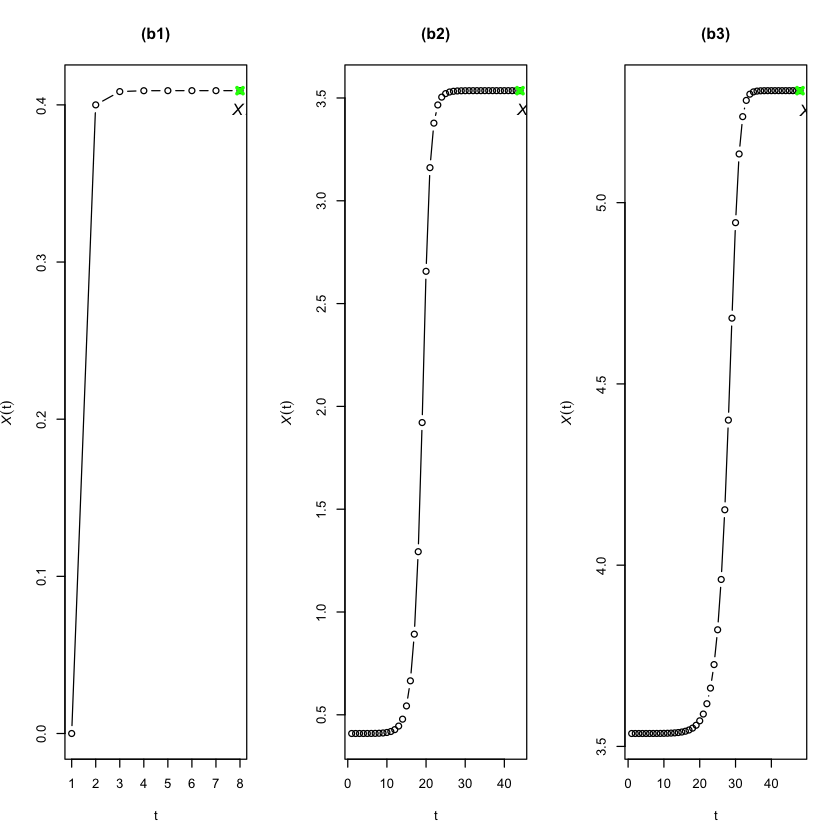

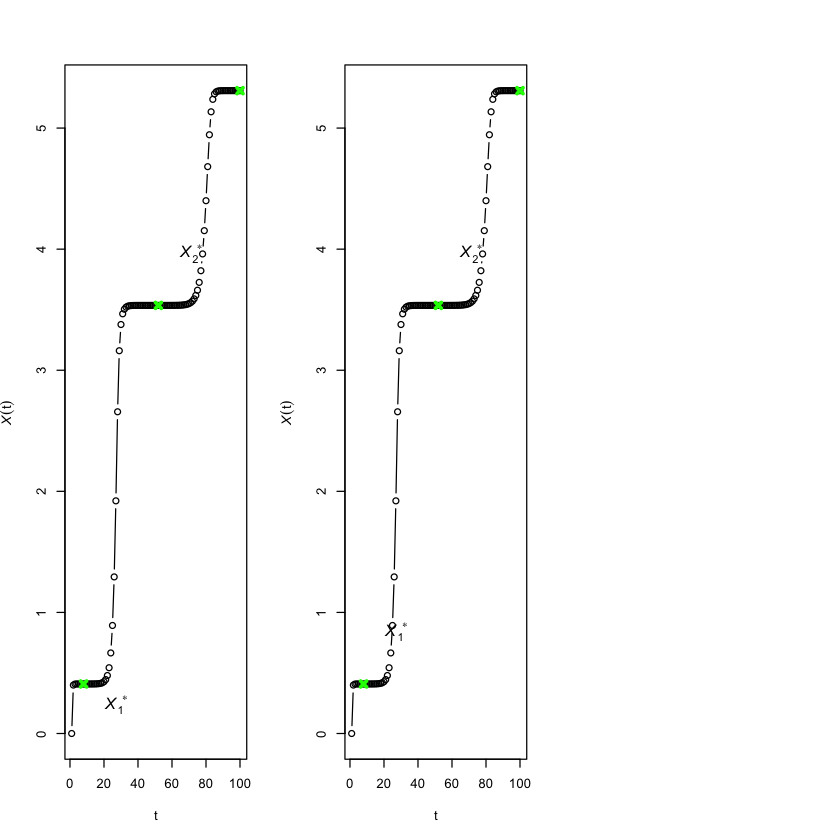

In [5]:
#####case 3: Solving an equation with multiple roots
############plot of multiroot###############
library(latex2exp)

a2 = -0.5
a1 = -2
a0 = 1
root.sin = function(a2,a1,a0,x0=0){
  xt.save = c(); yt.save = c()
  xt = x0; y1t = a2*xt+a1*sin(xt)+a0
  xt.save[1] = xt; yt.save[1] = y1t
  k = 1; esp = 1
  while(esp>1e-8){
    if(y1t>0){b1 = 0.4}else{
      a2 = - a2
      a1 = - a1
      a0 = -a0
      b1 = 2/3
      y1t = a2*xt+a1*sin(xt)+a0
      }
    xt.save[k+1] = b1*y1t + xt
    yt.save[k+1] = a2*xt.save[k+1]+a1*sin(xt.save[k+1])+a0
    esp = abs(yt.save[k+1])
    xt = xt.save[k+1]
    y1t = yt.save[k+1]
    k = k+1
  }
  return(rbind(xt.save,yt.save))
}
res1 = root.sin(a2,a1,a0,x0=0)
res2 = root.sin(a2,a1,a0,x0=4.090497e-01+0.00001)
res3 = root.sin(a2,a1,a0,x0=3.535612e+00+0.00001)

num1 = length(res1[1,])
num2 = length(res2[1,])
num3 = length(res3[1,])

par(mfrow = c(1,3))
plot(c(res1[1,]),type='b',ylab = TeX('$\\textit{X}_^{(t)}$'),xlab = 't',main = '(b1)')
points(num1,res1[1,num1], lwd = 3, col = "green" , pch=4)
legend(num1-1.5,res1[1,num1], bty='n',legend = TeX('$\\textit{X}_1^*$'),cex=1.2)

plot(c(res2[1,]),type='b',ylab = TeX('$\\textit{X}_^{(t)}$'),xlab = 't',main = '(b2)')
points(num2,res2[1,num2], lwd = 3, col = "green" , pch=4)
legend(num2-8,res2[1,num2], bty='n',legend = TeX('$\\textit{X}_2^*$'),cex=1.2)

plot(c(res3[1,]),type='b',ylab = TeX('$\\textit{X}_^{(t)}$'),xlab = 't',main = '(b3)')
points(num3,res3[1,num3], lwd = 3, col = "green" , pch=4)
legend(num3-8,res3[1,num3], bty='n',legend = TeX('$\\textit{X}_3^*$'),cex=1.2)


plot(c(res1[1,],res2[1,],res3[1,]),type='b',ylab = TeX('$\\textit{X}_^{(t)}$'),xlab = 't')
points(num1,res1[1,num1], lwd = 3, col = "green" , pch=4)
legend(num1-4,res1[1,num1], bty='n',legend = TeX('$\\textit{X}_1^*$'),cex=1.2)

points(num2+num1,res2[1,num2], lwd = 3, col = "green" , pch=4)
legend(num2+num1-4,res2[1,num2]+0.6, bty='n',legend = TeX('$\\textit{X}_2^*$'),cex=1.2)

points(num3+num2+num1,res3[1,num3], lwd = 3, col = "green" , pch=4)
legend(num3+num2+num1-5,res3[1,num3], bty='n',legend = TeX('$\\textit{X}_3^*$'),cex=1.2)

plot(c(res1[1,],res2[1,],res3[1,]),type='b',ylab = TeX('$\\textit{X}_^{(t)}$'),xlab = 't')
points(num1,res1[1,num1], lwd = 3, col = "green" , pch=4)
legend(num1-4,res1[1,num1]+0.6, bty='n',legend = TeX('$\\textit{X}_1^*$'),cex=1.2)

points(num2+num1,res2[1,num2], lwd = 3, col = "green" , pch=4)
legend(num2+num1-4,res2[1,num2]+0.6, bty='n',legend = TeX('$\\textit{X}_2^*$'),cex=1.2)

points(num3+num2+num1,res3[1,num3], lwd = 3, col = "green" , pch=4)
legend(num3+num2+num1-5,res3[1,num3], bty='n',legend = TeX('$\\textit{X}_3^*$'),cex=1.2)


In [6]:
#### case 4: Computational efficiency of the proposed fast US algorithm
## computation efficiency of fast US in Yule distribution

library(VGAM)
library(lubridate)

est_theta_func_NR = function(theta0 = 1){
  esp = 1
  thetat = theta0
  k = 1
  while(esp>1e-8){
    C1 = 0
    C2 = 0
    for(i in c(1:n)){
      x.len = min(x[i],1000)
      C1 = C1 - sum(1/(c(0:(x.len-1))+thetat+1))
      C2 = C2 + sum(1/(c(0:(x.len-1))+thetat+1)^2)
    }
    gt = n/thetat + C1
    g.prime = -n/thetat^2 + C2
    theta.t1 = thetat - gt/g.prime
    esp = abs(thetat-theta.t1)
    thetat = theta.t1
    k= k+1
    
    if(is.na(esp)){thetat=0; break}
  }
  return(c(k-1,thetat))
}

est_theta_func_fast_US = function(theta0 = 1){
  C= n
  esp = 1
  thetat = theta0
  k = 1
  while(esp>1e-8){
    C1 = 0
    C2 = 0
    for(i in c(1:n)){
      x.len = min(x[i],1000)
      C1 = C1 - sum(1/(c(0:(x.len-1))+thetat+1))
      C2 = C2 + sum(1/(c(0:(x.len-1))+thetat+1)^2)
    }
    gt = n/thetat + C1
    g.prime = -n/thetat^2 + C2
    b_theta = -n/thetat^2 + C/(thetat+1)^2
    A1 = gt - n/thetat + C/(thetat+1)
    A2 = A1 + n - C
    theta.t1 = -(A2+sqrt(A2^2-4*A1*n))/(2*A1)
    s.ratio = min(b_theta/g.prime*(g.prime<0) + (g.prime>0),2)
    theta.t1 = thetat + s.ratio*(theta.t1 - thetat)
    if(theta.t1<0){theta.t1 = 1e-8}
    esp = abs(thetat-theta.t1)
    thetat = theta.t1
    k= k+1
  }
  return(c(k-1,thetat))
}
  
est_theta_func_US = function(theta0 = 1){
  C= n
  esp = 1
  thetat = theta0
  k = 1
  while(esp>1e-8){
    C1 = 0
    for(i in c(1:n)){
      x.len = min(x[i],1000)
      C1 = C1 - sum(1/(c(0:(x.len-1))+thetat+1))
    }
    gt = n/thetat + C1
    b_theta = -n/thetat^2 + C/(thetat+1)^2
    A1 = gt - n/thetat + C/(thetat+1)
    A2 = A1 + n - C
    theta.t1 = -(A2+sqrt(A2^2-4*A1*n))/(2*A1)
    esp = abs(thetat-theta.t1)
    thetat = theta.t1
    k= k+1
  }
  return(c(k-1,thetat))
}


est_theta_func_fast_FP = function(theta0 = 1){
  esp = 1
  thetat = theta0
  k = 1
  while(esp>1e-8){
    C1 = 0
    C2 = 0
    for(i in c(1:n)){
      x.len = min(x[i],1000)
      C1 = C1 - sum(1/(c(0:(x.len-1))+thetat+1))
      C2 = C2 + sum(1/(c(0:(x.len-1))+thetat+1)^2)
    }
    gt = n/thetat + C1
    g.prime = -n/thetat^2 + C2
    b_theta = -n/thetat^2
    A1 = gt - n/thetat
    A2 = A1 + n
    theta.t1 = -(A2+sqrt(A2^2-4*A1*n))/(2*A1)
    s.ratio = min(b_theta/g.prime*(g.prime<0) + (g.prime>0),2)
    theta.t1 = thetat + s.ratio*(theta.t1 - thetat)
    if(theta.t1<0){theta.t1 = 1e-8}
    esp = abs(thetat-theta.t1)
    thetat = theta.t1
    k= k+1
  }
  return(c(k-1,thetat))
}

est_theta_func_FP = function(theta0 = 1){
  thetat = theta0
  k = 1
  esp = 1
  while(esp>1e-8){
    C1 = 0
    for(i in c(1:n)){
      x.len = min(x[i],1000)
      C1 = C1 - sum(1/(c(0:(x.len-1))+thetat+1))
    }
    gt = n/thetat + C1
    b_theta = -n/thetat^2
    A1 = gt - n/thetat
    A2 = A1 + n
    theta.t1 = -(A2+sqrt(A2^2-4*A1*n))/(2*A1)
    esp = abs(thetat-theta.t1)
    thetat = theta.t1
    k= k+1
  }
  return(c(k-1,thetat))
}


est_theta_func_SLF = function(theta0 = 1){
  esp = 1
  theta.all = c()
  thetat = theta0
  theta.all[1] = thetat
  n = length(x)
  k = 1
  while(esp>1e-8){
    C1 = 0
    G = 0
    a3.tra = 0
    a4.tra = 0
    for(i in c(1:n)){
      x.len = min(x[i],1000)
      r.i = 1/(c(0:(x.len-1))+thetat+1)
      C1 = C1 - sum(r.i)
      G = G + sum(r.i^2)
      a3.tra = a3.tra + sum(r.i^3)
      a4.tra = a4.tra + sum(c(1:x.len)*r.i^3)
    }
    a3 = G^3/a3.tra^2
    a4 = a4.tra/a3.tra
    gt = n/thetat + C1
    A1 = gt - n/thetat + a3/(thetat+a4)
    A2 = A1*a4 + n-a3
    A3 = n*a4
    theta.t1 = -(A2+sqrt(A2^2-4*A1*A3))/(2*A1)
    esp = abs(thetat-theta.t1)
    thetat = theta.t1
    k= k+1
    theta.all[k] = theta.t1
  }
  return(c(k,theta.all))
}

rest.all = matrix(0,72,4)
k.num = 1
times.rep = 100

for(kk in c(1:4)){
  for(tt in c(1:3)){
    for(zz in c(1:6)){
      theta.ori = c(0.5,1,5,10)[kk]  # true parameter
      n = c(100,200,400)[tt]         # sample size
      time_start = Sys.time()
      times.all = 1
      k.all = c()
      est.all = c()
      while(times.all <= times.rep){
        x = ryules(n, theta.ori)
        theta0 = runif(1,1,5)         # initial value
        if(zz == 1){
          est1 = est_theta_func_US(theta0)
        }else if(zz == 2){
          est1 = est_theta_func_fast_US(theta0)
        }else if(zz == 3){
          est1 = est_theta_func_NR(theta0)
        }else if(zz == 4){
          est1 = est_theta_func_FP(theta0)
        }else if(zz == 5){
          est1 = est_theta_func_fast_FP(theta0)
        }else{
          est1 = est_theta_func_SLF(theta0)
        }
        k.all[times.all] = est1[1]
        est.all[times.all] = est1[2]
        times.all = times.all +1
      }
      time_end = Sys.time()
      rest.all[k.num,] = c(k.num, as.duration(time_end - time_start),mean(k.all[est.all>0]),sum(est.all<0)/length(est.all))
      k.num = k.num+1
    }
  }
}
print(rest.all)

sum(rest.all[,2])

time_start = Sys.time()
times.all = 1
k.all = c()
est.all = c()
theta.ori = 0.5
theta0 = runif(1,1,5)
while(times.all <= 100){
  x = ryules(n, theta.ori)
  theta0 = runif(1,1,5)
  # est1 = est_theta_func_fast_FP(theta0)
  # est1 = est_theta_func_FP(theta0)
  est1 = est_theta_func_fast_US(theta0)
  # est1 = est_theta_func_US(theta0)
  # est1 = est_theta_func_NR(theta0)
  k.all[times.all] = est1[1]
  est.all[times.all] = est1[2]
  times.all = times.all +1
}
time_end = Sys.time()
time_end - time_start
mean(k.all)
sum(est.all<=0)/length(est.all)

Loading required package: stats4

Loading required package: splines


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




      [,1]        [,2]       [,3] [,4]
 [1,]    1  0.10894704   8.510000 0.00
 [2,]    2  0.14382100   5.280000 0.00
 [3,]    3  7.60145879        NaN 0.27
 [4,]    4  0.13650084  12.370000 0.00
 [5,]    5  0.14427495   6.320000 0.00
 [6,]    6  0.14371014   4.660000 0.00
 [7,]    7  0.23122597   8.480000 0.00
 [8,]    8  0.20517302   5.160000 0.00
 [9,]    9 16.52509403        NaN 0.20
[10,]   10  0.25680685  12.310000 0.00
[11,]   11  0.24188805   6.280000 0.00
[12,]   12  0.25937200   4.700000 0.00
[13,]   13  0.34734797   8.590000 0.00
[14,]   14  0.40358186   5.260000 0.00
[15,]   15 26.85475802  12.500000 0.32
[16,]   16  0.49224305  12.140000 0.00
[17,]   17  0.50718594   6.280000 0.00
[18,]   18  0.50084805   4.690000 0.00
[19,]   19  0.06337404  11.070000 0.00
[20,]   20  0.05447984   5.640000 0.00
[21,]   21  2.55726004   7.428571 0.27
[22,]   22  0.10079980  19.100000 0.00
[23,]   23  0.05915594   6.390000 0.00
[24,]   24  0.05147886   4.510000 0.00
[25,]   25  0.11801982  1

[1] 92.44749

Time difference of 0.4044361 secs

[1] 5.17

[1] 0